In [1]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17493 (from 3)
Receiving objects: 100% (17511/17511), 16.60 MiB | 18.10 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
/content/yolov5


In [2]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [4]:
from google.colab import files

uploaded = files.upload()

video_path = next(iter(uploaded.keys()))
print("Uploaded video:", video_path)


Saving background video _ people _ walking _.mp4 to background video _ people _ walking _.mp4
Uploaded video: background video _ people _ walking _.mp4


In [5]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.conf = 0.25  # confidence threshold


/usr/local/lib/python3.11/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-7-12 Python-3.11.13 torch-2.6.0+cu124 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 91.5MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# Assignment 1

In [6]:
import cv2
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import torch

video_path = 'background video _ people _ walking _.mp4'
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.conf = 0.25                    # confidence threshold


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-7-12 Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [7]:
cap = cv2.VideoCapture(video_path)
frames = []          # will hold (frame_idx, BGR_image)
idx = 0

while True:
    ret, img = cap.read()
    if not ret:
        break
    if idx % 5 == 0:
        frames.append((idx, img.copy()))
    idx += 1

cap.release()
print(f"Extracted {len(frames)} frames (every 5th frame).")


Extracted 69 frames (every 5th frame).


In [8]:
summary = {}

for frame_idx, img in frames:
    # YOLOv5 inference (returns a Results object)
    results = model(img)
    detections = []

    # each row: [x1, y1, x2, y2, conf, cls]
    for *box, conf, cls in results.pred[0].cpu().numpy():
        x1, y1, x2, y2 = map(float, box)
        detections.append({
            'class': model.names[int(cls)],
            'bbox': [x1, y1, x2, y2],
            'confidence': float(conf)
        })

    summary[f'frame_{frame_idx}'] = {'detections': detections}


with open('detections.json', 'w') as f:
    json.dump(summary, f, indent=2)

print("Saved detections.json with your summary.")


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

Saved detections.json with your summary.


In [9]:
# Total counts per class
all_detects = [
    det['class']
    for frame_data in summary.values()
    for det in frame_data['detections']
]
counts = Counter(all_detects)
print("Total object counts:\n", counts)

# unique classes per frame
diversity = {
    frame: len({det['class'] for det in data['detections']})
    for frame, data in summary.items()
}
best_frame = max(diversity, key=diversity.get)
print(f"Frame with max class diversity: {best_frame} ({diversity[best_frame]} classes)")


Total object counts:
 Counter({'person': 2275, 'handbag': 81, 'backpack': 7, 'dog': 6, 'suitcase': 4, 'skateboard': 3, 'skis': 2, 'umbrella': 2, 'snowboard': 1})
Frame with max class diversity: frame_95 (4 classes)


In [12]:
%matplotlib inline


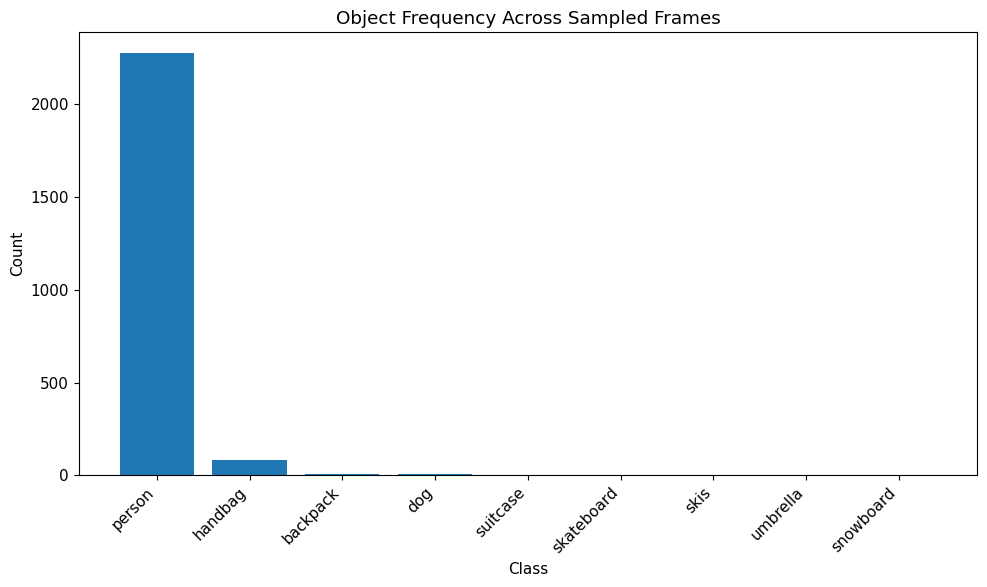

In [14]:
df = pd.DataFrame(counts.items(), columns=['class', 'count']).sort_values('count', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(df['class'], df['count'])
plt.xticks(rotation=45, ha='right')
plt.title('Object Frequency Across Sampled Frames')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Assignment 2

In [15]:
video_path = 'background video _ people _ walking _.mp4'
cap = cv2.VideoCapture(video_path)

frames_to_process = []
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # pick every 3rd frame
    if frame_count % 3 == 0:
        frames_to_process.append((frame_count, frame.copy()))
    frame_count += 1

cap.release()
print(f"Collected {len(frames_to_process)} frames for detection.")


Collected 114 frames for detection.


In [16]:
people_counts = []
output_detections = {}   # full detection data, if you want to reuse

for fid, frame in frames_to_process:
    results = model(frame)
    dets = results.pred[0].cpu().numpy()
    # count how many “person” detections
    count_person = sum(1 for *_, conf, cls in dets
                       if model.names[int(cls)] == 'person')
    people_counts.append((fid, count_person))
    # store full detections
    output_detections[fid] = [
        {
          'class': model.names[int(cls)],
          'bbox': [float(x1) for x1 in box],
          'confidence': float(conf)
        }
        for *box, conf, cls in dets
    ]


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.am

In [18]:
from collections import deque
alert_log = []
window = deque(maxlen=5)

for fid, count in people_counts:
    window.append((fid, count))
    # once window is “full”, check if every entry has ≥3 people
    if len(window) == 5 and all(c >= 3 for _, c in window):
        # log at the latest frame in window
        alert_log.append({'frame': fid, 'alert': 'Crowd Detected'})

# Deduplicate in case overlapping windows fire multiple times for the same frame
alert_log = {entry['frame']: entry for entry in alert_log}
alert_log = list(alert_log.values())

print("Alerts:", alert_log)


Alerts: [{'frame': 12, 'alert': 'Crowd Detected'}, {'frame': 15, 'alert': 'Crowd Detected'}, {'frame': 18, 'alert': 'Crowd Detected'}, {'frame': 21, 'alert': 'Crowd Detected'}, {'frame': 24, 'alert': 'Crowd Detected'}, {'frame': 27, 'alert': 'Crowd Detected'}, {'frame': 30, 'alert': 'Crowd Detected'}, {'frame': 33, 'alert': 'Crowd Detected'}, {'frame': 36, 'alert': 'Crowd Detected'}, {'frame': 39, 'alert': 'Crowd Detected'}, {'frame': 42, 'alert': 'Crowd Detected'}, {'frame': 45, 'alert': 'Crowd Detected'}, {'frame': 48, 'alert': 'Crowd Detected'}, {'frame': 51, 'alert': 'Crowd Detected'}, {'frame': 54, 'alert': 'Crowd Detected'}, {'frame': 57, 'alert': 'Crowd Detected'}, {'frame': 60, 'alert': 'Crowd Detected'}, {'frame': 63, 'alert': 'Crowd Detected'}, {'frame': 66, 'alert': 'Crowd Detected'}, {'frame': 69, 'alert': 'Crowd Detected'}, {'frame': 72, 'alert': 'Crowd Detected'}, {'frame': 75, 'alert': 'Crowd Detected'}, {'frame': 78, 'alert': 'Crowd Detected'}, {'frame': 81, 'alert': 'C

In [19]:
# JSON
with open('alerts.json', 'w') as f:
    json.dump(alert_log, f, indent=2)

# TXT
with open('alerts.txt', 'w') as f:
    for entry in alert_log:
        f.write(f"Frame {entry['frame']}: {entry['alert']}\n")

print("Saved alerts.json and alerts.txt.")


Saved alerts.json and alerts.txt.


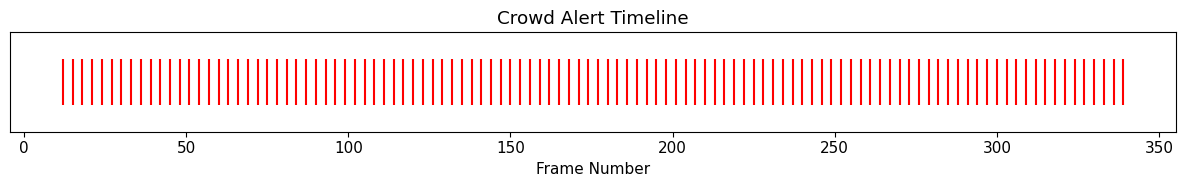

In [20]:
alert_frames = [e['frame'] for e in alert_log]

plt.figure(figsize=(12, 2))
plt.eventplot(alert_frames, orientation='horizontal', colors='red')
plt.xlabel('Frame Number')
plt.yticks([])
plt.title('Crowd Alert Timeline')
plt.tight_layout()
plt.show()
